In [431]:
# This exercise is about learning the first component of PCA
# This is done by stochastic gradient and steepest gradient (i.e., batch) algorithms
#
# Of course PCA can be directly obtained via eigenvalue decomposition, but the goal here is to 
# become familiar with gradient descent and stochastic descent

import copy
import numpy as np
import matplotlib.pyplot as plt

N = 10000
x = np.random.randn(2,N)
C = np.array([[3,1],[1,2]])
A = np.linalg.cholesky(C)
x = A@x
Chat = x@x.T/N

# The solution should converge to the eigenvector
ev = np.linalg.eig(Chat)[1][:,0].reshape(-1,1)
w0 = np.random.randn(2,1)
print(x@x.T/N)

# the cost function for PCA
def J(w):
    cost = (x**2).sum(axis=0).mean()
    cost -= ((w.T@x)**2).mean()
    return cost

[[2.93813846 0.96587524]
 [0.96587524 1.96754047]]


[[0.85120078 0.52484682]]
6.448323934781133e-05


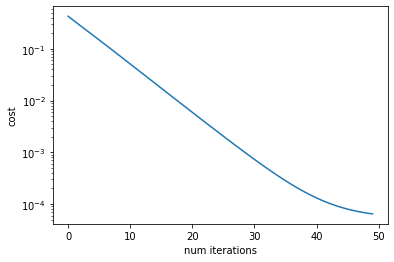

In [432]:
MAXITER = 50
alpha = 0.00001
w = copy.deepcopy(w0)
dev = []
dev.append(np.linalg.norm(np.abs(w)-np.abs(ev)))

Js = [J(w)]
for oi in range(MAXITER):    
    for i in range(N):
        xi = x[:,i:i+1]
        yi = w.T@xi
        dw = xi*yi-((yi**2)*w)
        w += alpha*dw
    Js.append(J(w))
    dev.append(np.linalg.norm(np.abs(w)-np.abs(ev)))

plt.semilogy(dev[1:])
plt.xlabel('num iterations')
plt.ylabel('cost')
print(w.T)
print(np.linalg.norm(np.abs(w)-np.abs(ev)))

5.2616685449466025e-05


Text(0, 0.5, 'cost')

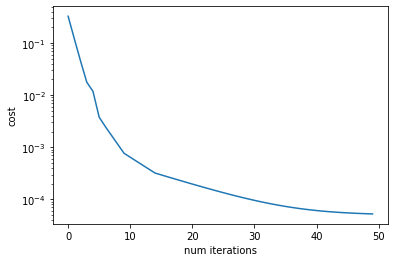

In [435]:
# Batch gradient descent
MAXITER = 50
alpha = 0.3
dev = []
w = copy.deepcopy(w0)
Js = []
for oi in range(MAXITER):
    Exy = 0
    Ey2w = 0
    if oi == 5:
        alpha /= 2
    if oi == 10:
        alpha /= 2
    if oi == 15:
        alpha /= 2
    
    for i in range(N):
        xi = x[:,i:i+1]
        yi = w.T@xi
        Exy += xi*yi
        Ey2w += (yi**2)*w
    
    dw = Exy/N-Ey2w/(N-1)
    w += (alpha)*dw
    Js.append(J(w))
    dev.append(np.linalg.norm(np.abs(w)-np.abs(ev)))

print(np.linalg.norm(np.abs(w)-np.abs(ev)))

#plt.plot(Js)
plt.semilogy(dev)
plt.xlabel('num iterations')
plt.ylabel('cost')

In [388]:
print(Exy/N)

[[3.0693875 ]
 [1.93459974]]


In [185]:
print(cost)

1.4042161638565474


In [181]:
print(w.T@w)

[[0.99985201]]


In [143]:
print(np.linalg.eig(C))

(array([3.61803399, 1.38196601]), array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]]))


(array([3.61803399, 1.38196601]), array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]]))
